In [1]:
from obj_func import *
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn import ensemble
import kmapper as km
from kmapper.plotlyviz import *
from kmapper import jupyter
import networkx as nx
import warnings
warnings.filterwarnings("ignore")

from scipy.spatial import distance_matrix
from sklearn.cluster import DBSCAN
from sklearn import ensemble
import sklearn

In [2]:
buffalo = ObjectFile("Bison.obj")

Unimplemented OBJ format statement 'g' on line 'g Bison'
Unimplemented OBJ format statement 'g' on line 'g Bison'


In [3]:
buffalo.df

,X,Y,Z
0,0.140922,0.033015,-0.027034
1,0.138138,0.042252,0.017482
2,0.138331,0.075997,0.019199
3,0.140121,0.065337,0.005609
4,0.144385,0.073148,-0.020941
...,...,...,...
3816,0.175036,0.047909,-0.117375
3817,0.192501,0.051748,-0.112110
3818,0.021025,-0.081706,0.498075
3819,0.020181,-0.082711,0.494245


In [4]:
all_points = buffalo.np_array.transpose()

In [5]:
all_points

array([[ 0.140922,  0.033015, -0.027034],
       [ 0.138138,  0.042252,  0.017482],
       [ 0.138331,  0.075997,  0.019199],
       ...,
       [ 0.021025, -0.081706,  0.498075],
       [ 0.020181, -0.082711,  0.494245],
       [ 0.021161, -0.086991,  0.501784]], dtype=float32)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(all_points)
#print(scaler.data_max_)
all_points = scaler.transform(all_points)

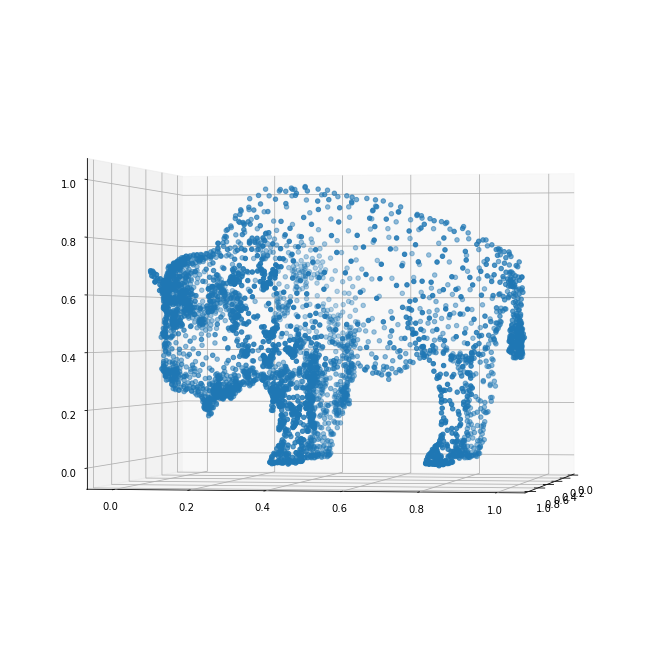

In [7]:
x = all_points[:,0]
y = all_points[:,1]
z = all_points[:,2]
fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,z,y)
ax.view_init(0, 10)

plt.show()

In [8]:
def centrality(data):
    distances = distance_matrix(data,data)
    sums = np.sum(distances, axis=0)
    centrality = sums/distances.shape[0]
    values = np.array([[i] for i in centrality])
    return values

In [9]:
cen = centrality(all_points)

# y-coordinate filter

In [10]:
#initiate the mapper object and lens the first two coordinates
mapper = km.KeplerMapper(verbose = 0)
lens = mapper.fit_transform(all_points, projection = [1])


# Define the simplicial complex using different parameters like lens, cover, and clusterer
scomplex = mapper.map(lens,
                      all_points,
                      cover=km.Cover(n_cubes=10, perc_overlap=0.35),
                      clusterer= DBSCAN(eps = .3))

# Visualize it
html = mapper.visualize(scomplex, 
                        color_values= z,
                        color_function_name = 'height',
                        node_color_function = ['median', 'max'], 
                        path_html="buff.html",
                        title="buff")

# Inline display
# jupyter.display(path_html="http://mlwave.github.io/tda/word2vec-gender-bias.html")
jupyter.display(path_html="buff.html")

# $x$-coordinate filter

In [11]:
def mapper_kmeans_filter_coordinate(data, coordinates, n_cubes, perc_overlap, n_clusters):
    #initiate the mapper object and lens the first two coordinates
    mapper = km.KeplerMapper(verbose = 0)
    lens = mapper.fit_transform(data, projection = coordinates)
    scomplex = mapper.map(lens,
                      data,
                      cover=km.Cover(n_cubes, perc_overlap),
                      clusterer= sklearn.cluster.KMeans(n_clusters,
                                                       random_state=3471))
    html = mapper.visualize(scomplex, 
                        color_values= data[:,2],
                        color_function_name = 'height',
                        node_color_function = ['median', 'max', 'mean'], 
                        path_html="output.html",
                        title="output")
    jupyter.display(path_html="output.html")
    

In [12]:
mapper_kmeans_filter_coordinate(all_points, [1], 5, 0.1, 3)